# Быстрая гистограмма
- Реализовать свою функцию построения дискретного распределения.
- С помощью результатов своего алгоритма и plt.bar построим гистограмму по массиву из 50+ случайных чисел.
- Сравним скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. Напишем decorator timer

In [89]:
def timer(number):
    def decorator(func):
        import time

        def wrapper(*args, **kwargs):
            result = 0
            for i in range(0, number):
                start = time.time()
                func(*args, **kwargs)
                end = time.time()
                result += end - start
            print("Method: ", func.__name__, ", Time:", result / number)
            return func(*args, **kwargs)

        return wrapper

    return decorator

In [90]:
from typing import List, Tuple, Union

import matplotlib.pyplot as plt

@timer(100)
def fast_hist(arr: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param arr: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    min_val = min(arr)
    max_val = max(arr)
    step = (max_val - min_val) / bins
    bins_labels = [min_val + i * step for i in range(bins)]
    bins_labels.append(max_val)
    bins_values = [0] * bins
    for val in arr:
        for i in range(bins):
            if bins_labels[i] <= val < bins_labels[i + 1]:
                bins_values[i] += 1
            if i + 1 == len(bins_labels) - 1 and bins_labels[i + 1] == val:
                bins_values[i] += 1
    return bins_values, bins_labels

@timer(100)
def hist(arr, bins):
    return plt.hist(arr, bins=bins)

[7 4 2 7 6 5 6 7 9 6 3 6 6 0 1 6 8 8 3 2 9 0 1 7 8 0 6 6 5 0 2 6 3 5 1 3 6
 3 6 6 1 1 2 4 4 0 4 3 9 6]
Method:  fast_hist , Time: 0.0009197640419006348
Значения колонок: [5, 5, 4, 6, 4, 3, 13, 4, 3, 3]
Названия колонок: [0.0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9]


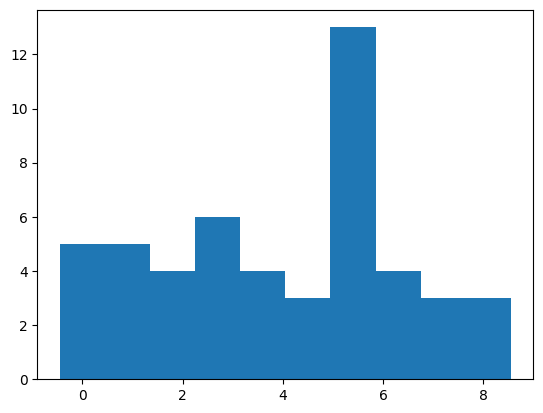

In [91]:
import numpy.random as rand

array = rand.randint(low=0, high=10, size=50)
print(array)

value_counts, bins_names = fast_hist(array, bins=len(set(array)))

plt.bar(bins_names[:-1], value_counts, width=bins_names[1] - bins_names[0])

print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

Method:  hist , Time: 0.012773196697235107
Значения колонок: [ 5.  5.  4.  6.  4.  3. 13.  4.  3.  3.]
Названия колонок: [0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2 8.1 9. ]


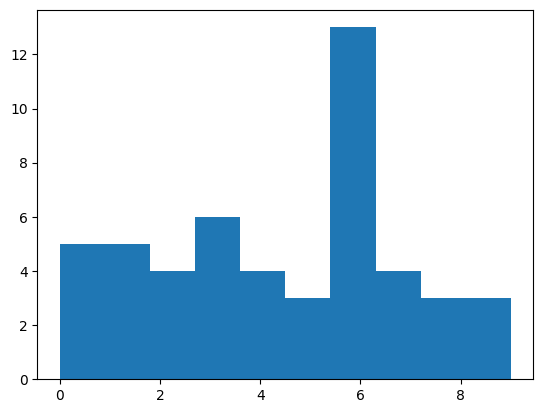

In [92]:
value_counts, bins_names, visual_figure = hist(array, bins=len(set(array)))
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)